In [48]:
import pandas as pd

In [49]:
df = pd.read_csv('https://raw.githubusercontent.com/stedy/Machine-Learning-with-R-datasets/master/insurance.csv') 
df.head() 


,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [50]:
df.isnull().sum()
import numpy as np

In [51]:
np.random.seed(0) # for reproducibility 
for _ in range(10): 
	r = np.random.randint(len(df)) 
	c = np.random.randint(6) 
	df.iloc[r, c] = np.nan 


In [52]:
df.isnull().sum()

age         2
sex         1
bmi         1
children    3
smoker      1
region      2
charges     0
dtype: int64

<Axes: xlabel='age', ylabel='Count'>

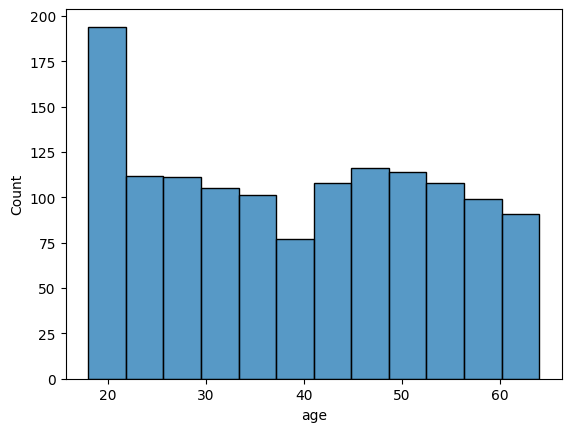

In [53]:
import seaborn as sns
sns.histplot(df,x="age")

<Axes: xlabel='sex', ylabel='count'>

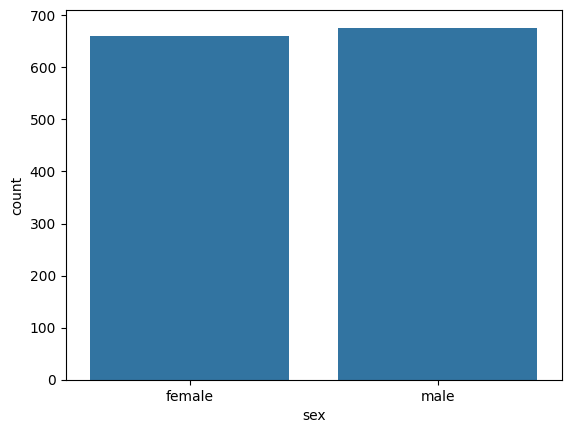

In [54]:
sns.countplot(df,x="sex")

<Axes: xlabel='region', ylabel='count'>

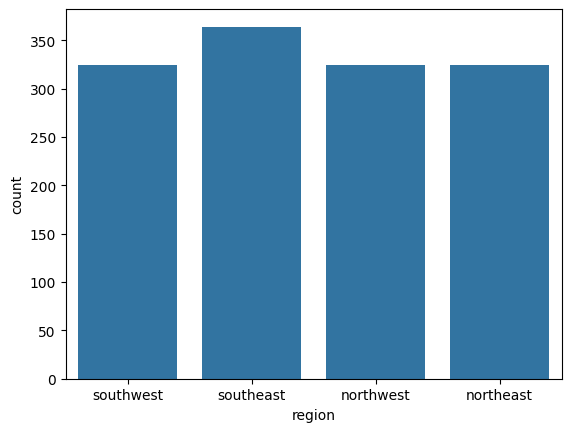

In [55]:
sns.countplot(df,x="region")

In [56]:
df.isnull().sum()

age         2
sex         1
bmi         1
children    3
smoker      1
region      2
charges     0
dtype: int64

In [57]:
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19.0,female,27.900,0.0,yes,southwest,16884.92400
1,18.0,male,33.770,1.0,no,southeast,1725.55230
2,28.0,male,33.000,3.0,no,southeast,4449.46200
3,33.0,male,22.705,0.0,no,northwest,21984.47061
4,32.0,male,28.880,0.0,no,northwest,3866.85520


In [58]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(df.drop("charges",axis=1),df["charges"],test_size=0.2,random_state=0)

In [59]:
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer


In [60]:
trf1= ColumnTransformer(transformers=[
("cat",SimpleImputer(strategy="most_frequent"),["sex","smoker","region"]),
("num",SimpleImputer(strategy="median"),["age","bmi","children"])

],remainder="passthrough"
)

In [61]:
X_train1=trf1.fit_transform(X_train)

In [67]:
X_train1=pd.DataFrame(df1,columns=["sex","smoker","region","age","bmi","children"])

In [68]:
X_train1.isnull().sum()

sex         0
smoker      0
region      0
age         0
bmi         0
children    0
dtype: int64

In [69]:
X_train1.head()

,sex,smoker,region,age,bmi,children
0,male,yes,southwest,37.0,34.1,4.0
1,male,no,southeast,18.0,34.43,0.0
2,female,yes,northeast,23.0,36.67,2.0
3,male,no,southwest,32.0,35.2,2.0
4,female,no,northeast,58.0,32.395,1.0


In [70]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder

In [75]:
trf2= ColumnTransformer(transformers=[
    ("ohe",OneHotEncoder(sparse_output=False,drop="first"),["sex","smoker","region"])


],remainder="passthrough")

In [79]:
df3=trf2.fit_transform(X_train1)

In [81]:
pd.DataFrame(df3)

,0,1,2,3,4,5,6,7
0,1.0,1.0,0.0,0.0,1.0,37.0,34.1,4.0
1,1.0,0.0,0.0,1.0,0.0,18.0,34.43,0.0
2,0.0,1.0,0.0,0.0,0.0,23.0,36.67,2.0
3,1.0,0.0,0.0,0.0,1.0,32.0,35.2,2.0
4,0.0,0.0,0.0,0.0,0.0,58.0,32.395,1.0
...,...,...,...,...,...,...,...,...
1065,1.0,0.0,0.0,0.0,0.0,27.0,26.03,1.0
1066,1.0,0.0,0.0,1.0,0.0,42.0,35.97,2.0
1067,1.0,0.0,0.0,1.0,0.0,40.0,25.08,1.0
1068,1.0,0.0,1.0,0.0,0.0,19.0,35.53,0.0
